In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

In [2]:
sys.path.append('../pypoptim/mpi_scripts/')
from ina_model import InaModel

In [3]:
dirname = '../src/model_ctypes/ina/'
filename_so = os.path.join(dirname, 'ina.so')

filename_so_abs = os.path.abspath(filename_so)

In [4]:
ina = InaModel(filename_so_abs)

In [5]:
legend_constants = pd.read_csv(os.path.join(dirname, "legend_constants.csv"), index_col='name')['value'] 
legend_states = pd.read_csv(os.path.join(dirname, "legend_states.csv"), index_col='name')['value'] 
legend_algebraic = pd.read_csv(os.path.join(dirname, "legend_algebraic.csv"), index_col='name')['value'] 

In [6]:
S = legend_states.copy()
C = legend_constants.copy()
A = legend_algebraic.copy()

In [7]:
df_protocol = pd.read_csv('../data/protocols/protocol_trace.csv')
df_initial_state_protocol = pd.read_csv('../data/protocols/protocol_initial_state_x3.csv')

In [8]:
i = ina.run(A,S,C , df_protocol, df_initial_state_protocol)

In [9]:
art_data = pd.read_csv('../data/training/artificial_data.csv')

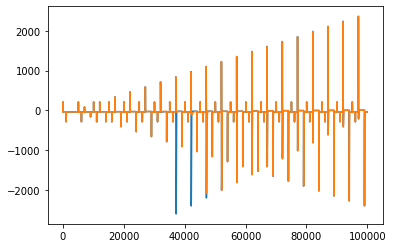

In [11]:
plt.plot(i.I_out)
plt.plot(art_data.I_out)

In [12]:
def give_tau(v_m, params):
    tau_m = 1 / (params.a0_m * np.exp(v_m / params.s_m) + params.b0_m * np.exp(- v_m / params.delta_m))
    tau_h = 1 / (params.a0_h * np.exp(-v_m / params.s_h) + params.b0_h * np.exp(v_m / params.delta_h))
    tau_j = params.tau_j_const + 1 / (params.a0_j * np.exp(-v_m / params.s_j) + params.b0_j * np.exp(v_m / params.delta_j))
    return {'tau_m': tau_m,
            'tau_h': tau_h,
            'tau_j': tau_j,
           }

In [13]:
V = np.arange(-120, 20)

In [14]:
tau = give_tau(V, C)

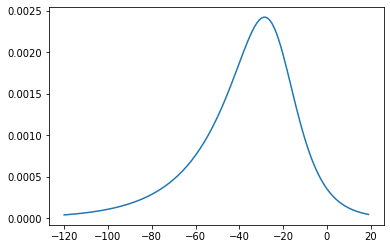

In [15]:
plt.plot(V,tau['tau_m'])

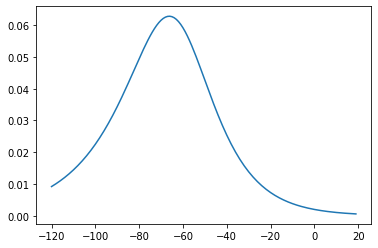

In [16]:
plt.plot(V,tau['tau_h'])

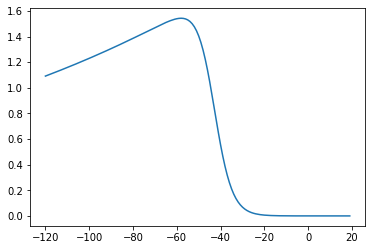

In [17]:
plt.plot(V,tau['tau_j'])

In [20]:
I = pd.DataFrame(np.array([art_data.t, i.I_out]).T, columns = ['t', 'I_out'])